In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../')
import dataset_wrapper as util

In [6]:
import ee
ee.Authenticate() 
ee.Initialize()

In [12]:
import geopandas as gpd
dataframe = gpd.read_file('/data2/hkaman/Data/CDL/California_Counties.geojson')
# dataframe = dataframe.to_crs(epsg=4326)
# dataframe

In [ ]:
import calendar
for year in range(2008, 2023):
    if year != 2012:
        for index in range(12):
            year = year
            month = index + 1
            last_day = calendar.monthrange(year, month)[1]
            start_date = f'{year}-{month:02d}-01'
            end_date = f'{year}-{month:02d}-{last_day}'

            DD = util.DownloadSatelliteImgEE(year = year,  
                                        county_name= 'Yolo',
                                        start_date = start_date,   
                                        end_date= end_date,              
                                        cloud_filter= 5, 
                                        satellite = 'Landsat')

            images  = DD.__call__()

### visualization

image name: Yolo_2022_05_01.tif


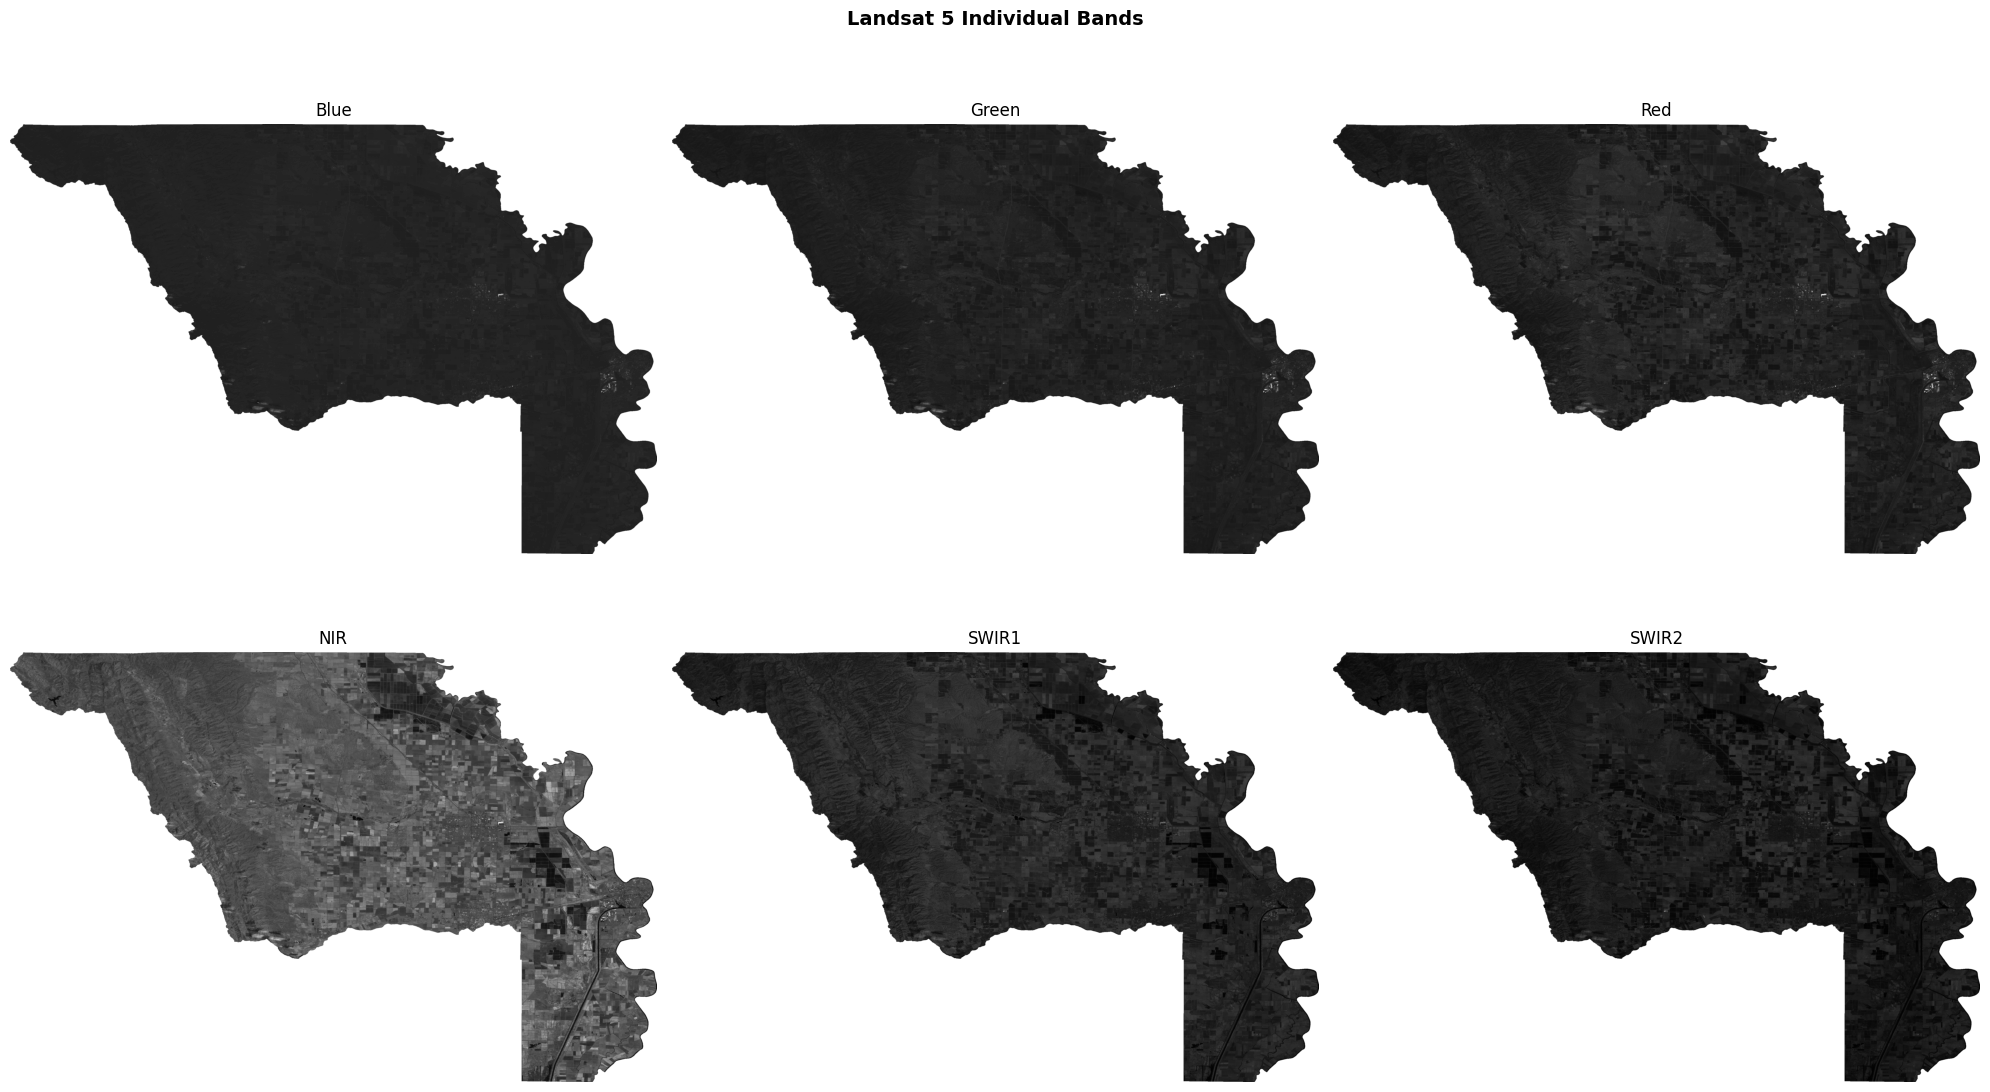

In [8]:
folder_path = f'/data2/hkaman/Data/FoundationModel/Inputs/Yolo/Raw/Landsat/{2022}/' 
util.plot_landsat5_all_bands_by_index(folder_path, 4)

In [27]:
parent_path = f'/data2/hkaman/Data/FoundationModel/Monterey/Landsat'
count_df = util.count_observations_by_month(parent_path)
count_df

CSV file saved at: /data2/hkaman/Data/FoundationModel/Monterey/Landsat/observations_per_month.csv


,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2008,0,1,1,1,1,1,1,1,1,1,0,0
2009,1,1,1,1,1,1,1,1,1,1,1,0
2010,0,0,1,1,1,1,1,1,1,1,1,0
2011,0,0,1,1,1,1,1,1,1,1,1,0
2013,0,0,0,0,1,1,1,1,1,1,1,1
2014,1,1,0,1,1,1,1,1,1,1,1,0
2015,1,1,1,1,1,1,1,0,1,1,0,0
2016,1,1,1,1,1,1,1,1,1,1,0,1
2017,1,0,1,1,1,1,1,1,1,1,1,1


Original shape: (35180, 38410)
Original CRS: EPSG:4326


<Figure size 1000x1000 with 0 Axes>

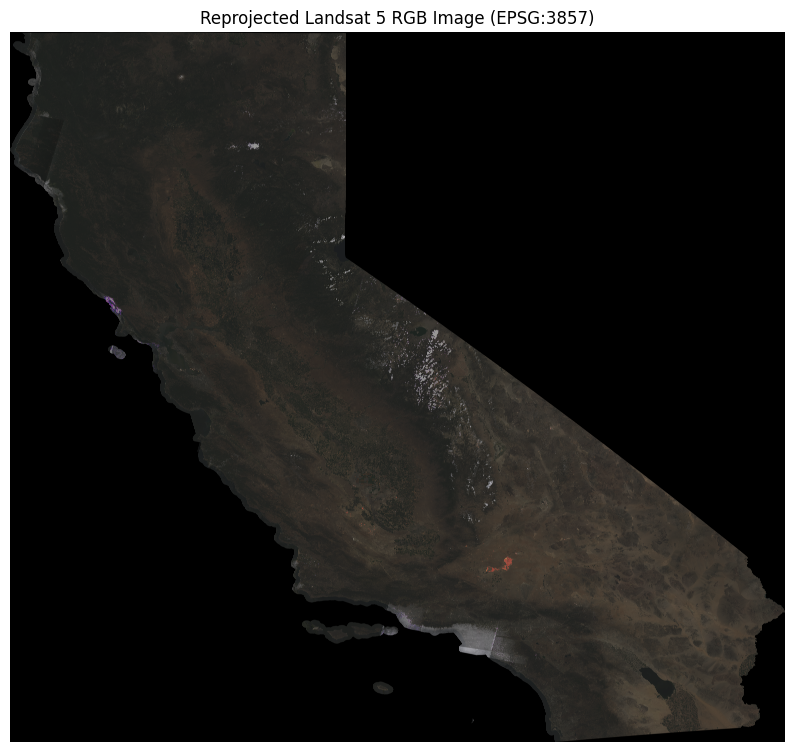

In [4]:
util.plot_landsat5_rgb('/data2/hkaman/Data/FoundationModel/Full/merged_landsat.tif')